## Matt's Challenge

You have a CSV file with x and y values. Write a program that reads the csv file and creates an ordered list for both the x and y values and then plots them. The program will then prompt the user what type of function to fit to the x and y values and the options should be 'line, exponential and quadratic' and then the program will perform the fit and product a second plot with the fitted values and print the R^2 parameters.

For the project to meet the requirements it has to contain python functions (for plotting and CSV data extraction as an example) that are well commented, it should use at least one external python library (such as matplotlib or numpy) 

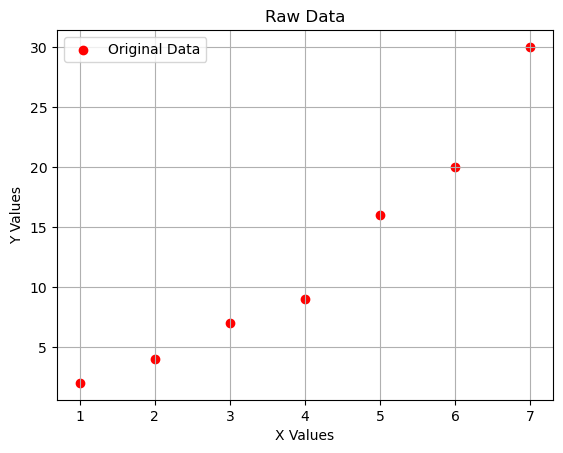

Choose the type of function to fit:
1. Line
2. Exponential
3. Quadratic


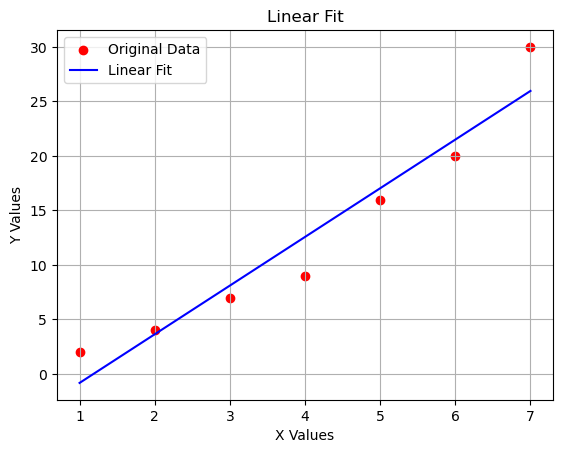

Linear Fit Parameters: [ 4.46428571 -5.28571429]
R^2: 0.9305 


In [2]:
## Code was initially generated using chatGPT and visualised in VSCode using an Anaconda environment with Python 3.7.1, numpy, matplotlib and scipy installed

import numpy as np          #for maths functions
import matplotlib.pyplot as plt         #useful for plotting
from scipy.optimize import curve_fit        #Performs curve fitting by finding parameters of a given function that best fit the data.
import csv      #used for reading and processing csv files

# Define a function that reads the CSV file and extracts the x and y values
def read_csv(filename):         #filename: a string path to the CSV file which we define in the main program
    data = []       #initialising an empty list which will hold tuples where each tuple contains an x value and a corresponding y value
    with open(filename, 'r') as file:       #opens file in read mode
        reader = csv.reader(file)           #object which allows you to iterate over the rows
        next(reader)  # Skip the header row
        for row in reader:      #a for loop which takes the value in row 0 (x) and row 1 (y) and adds them as a tuple to the data list
            data.append((float(row[0]), float(row[1])))

    # Sort the data in ascending order by the x values
    data.sort(key=lambda pair: pair[0])  
          # key allows you to specifiy how to sort (lambda is used as an annonymous function)
          # it then takes the tuples in the data list (pairs) and orders them based on pair[0] (first value or x value)                                   

    # Unpack sorted data into x and y values
    x_values = [pair[0] for pair in data]     #  uses list comprehension to take the first value of the pair and deem them the x_values
    y_values = [pair[1] for pair in data]     #  same as above but for the y_values

    return x_values, y_values

# Define a function to plot the original data using plot_data from matplotlib
def plot_data(x, y, title="", label=""):       
    plt.scatter(x, y, label=label, color='red')     #Generates scatter plot
    plt.title(title)
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.grid()
    plt.show()

# Define the linear function (y = a*x + b)
def linear_func(x, a, b):
    return a * x + b

# Define the exponential function: (y = a * exp(b * x) using np function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

#Define the quadratic function: (y = a * x^2 + b * x + c)
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

# Define a function that fits the function to the data and plots it
def fit_and_plot(x, y, func, func_name):        #fit_and_plot is an in-built function
## Parameters:
##     x (list): X-axis values.
##     y (list): Y-axis values.
##     func (callable): Function to fit.
##     func_name (str): Name of the function.

    params, _ = curve_fit(func, x, y)       #curve fit function from scipy.optimise fits a specified function to an x and y value
#       The output is an array of the best-fit parameters for the function, if it was a linear function (y=ax+b) it would give you a and b 
#       It also outputs a covariance matrix but as its not used in this code we use _ as a placeholder

# Generate fitted values using the x values and required function
    y_fit = func(np.array(x), *params)  # *params converts the params arrary to individual arguments for the function 

# Calculate R^2
    residuals = y - y_fit       #error between observed and predicted value
    ss_res = np.sum(residuals**2)       #sum of squares of residuals
    ss_tot = np.sum((y - np.mean(y))**2)    #Squares these deviations to calculate the variation around the mean - total sum of squares
    r_squared = 1 - (ss_res / ss_tot)

# Now plot original data and fitted curve on one graph
    plt.scatter(x, y, label='Original Data', color='red')
    plt.plot(x, y_fit, label="{} Fit".format(func_name), color='blue')
    plt.title("{} Fit".format(func_name))
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.grid()
    plt.show()

    print("{} Fit Parameters: {}".format(func_name, params))       #provides the determined best fit parameters for the chosen function
    print("R^2: {:.4f} ".format(r_squared))     #:.4f prints to 4 decimal places

#Now define the main program which will read data, prompt the user to select a file and also perform the fitting
def main():
# Read the data from the CSV file
    filename = input("Enter the CSV filename (e.g., data.csv): ")       #test file is titled CodingAssignment.csv 
    x, y = read_csv(filename)       #takes the local x_values and y_values we return in the read_csv function and now makes them global values

# Plot the raw data
    plot_data(x, y, title="Raw Data", label="Original Data")

# Prompt user for the type of fit
    print("Choose the type of function to fit:")
    print("1. Line")
    print("2. Exponential")
    print("3. Quadratic")
    choice = int(input("Enter your choice (1/2/3): "))      #outputs the users choice as an integer

#create an if/elif statement depending on the outcome of 'choice' which will plot the original and fitted on one graph as defined in fit_and_plot
    if choice == 1:
        fit_and_plot(x, y, linear_func, "Linear")
    elif choice == 2:
        fit_and_plot(x, y, exponential_func, "Exponential")
    elif choice == 3:
        fit_and_plot(x, y, quadratic_func, "Quadratic")
    else:
        print("Invalid choice. Please select 1, 2, or 3.")

if __name__ == "__main__":      # __name__ is a built in variable which checks that main function is only executed when the script is run directly
    main()
